## 드라이브 연결

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## 검증 옵션

11493376/11490434 [==============================] - 1s 0us/step


W0827 12:25:38.292765 140255129610112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0827 12:25:38.332387 140255129610112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0827 12:25:38.341901 140255129610112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0827 12:25:38.373875 140255129610112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0827 12:25:38.399073 140255129610112 deprecation_wrappe

Train on 700 samples, validate on 300 samples
Epoch 1/1000
700/700 [==============================] - 4s 6ms/step - loss: 2.2576 - acc: 0.1643 - val_loss: 2.2272 - val_acc: 0.1633
Epoch 2/1000
700/700 [==============================] - 0s 372us/step - loss: 2.2072 - acc: 0.1657 - val_loss: 2.1908 - val_acc: 0.1800
Epoch 3/1000
700/700 [==============================] - 0s 334us/step - loss: 2.1730 - acc: 0.1729 - val_loss: 2.1631 - val_acc: 0.1867
Epoch 4/1000
700/700 [==============================] - 0s 362us/step - loss: 2.1441 - acc: 0.1786 - val_loss: 2.1372 - val_acc: 0.1867
Epoch 5/1000
700/700 [==============================] - 0s 388us/step - loss: 2.1177 - acc: 0.1900 - val_loss: 2.1141 - val_acc: 0.1867
Epoch 6/1000
700/700 [==============================] - 0s 351us/step - loss: 2.0940 - acc: 0.2029 - val_loss: 2.0931 - val_acc: 0.2033
Epoch 7/1000
700/700 [==============================] - 0s 384us/step - loss: 2.0721 - acc: 0.2071 - val_loss: 2.0727 - val_acc: 0.2067
Epoc

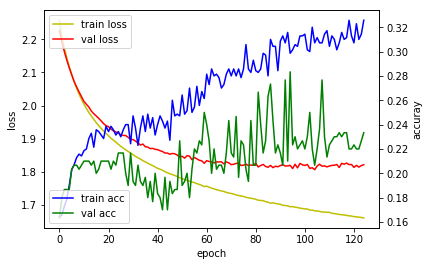

In [3]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

# 1. 데이터셋 준비하기

# 훈련셋과 시험셋 로딩
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋, 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

# 라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
from keras.callbacks import EarlyStopping
es=EarlyStopping(patience=20) # 조기 종료 콜백함수 객체
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=10, validation_data=(X_val, Y_val), callbacks=[es]) # validation data가 오버핏팅 되기전에 종료

# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

## stacked rnn

In [163]:
sentence= ("The regret after not doing something is bigger than that of doing something "
            "Ability is decided by one's own effort "
            "The difficulty in life is the choice.")
sentence

"The regret after not doing something is bigger than that of doing something Ability is decided by one's own effort The difficulty in life is the choice."

In [0]:
import tensorflow as tf
import numpy as np
from tensorflow.contrib import rnn

In [0]:
tf.reset_default_graph()

In [0]:
charSet=list(set(sentence)) # 중복되는 문자 없이 집합을 얻어낼 수 잇음
charDic={w:i for i, w in enumerate(charSet)}

In [170]:
charDic

{' ': 13,
 "'": 15,
 '.': 16,
 'A': 12,
 'T': 5,
 'a': 20,
 'b': 10,
 'c': 1,
 'd': 21,
 'e': 8,
 'f': 18,
 'g': 9,
 'h': 11,
 'i': 0,
 'l': 23,
 'm': 3,
 'n': 4,
 'o': 7,
 'r': 6,
 's': 22,
 't': 17,
 'u': 19,
 'w': 2,
 'y': 14}

In [0]:
data_dim=len(charDic) # input_dim = 24차원
num_classes=hidden_size=data_dim
sequence_length=10
learning_rate=0.1

In [0]:
datax=[]
datay=[]
# len(sentence) # 글자수 152
for i in range(0, len(sentence)-sequence_length): #(0~152-10) => (0,142)
  xstr=sentence[i:i+sequence_length] # 0~9
  ystr=sentence[i+1:i+sequence_length+1] # 1~10
  # print(i,xstr,"->",ystr)
  x=[charDic[c] for c in xstr] # c를 수치화
  y=[charDic[c] for c in ystr]
#   print(x)
#   print(y)
  datax.append(x)
  datay.append(y)
  
batch_size=len(datax) # 142


In [173]:
x=tf.placeholder(tf.int32, shape=[None,sequence_length])
y=tf.placeholder(tf.int32, shape=[None,sequence_length])

x_one_hot=tf.one_hot(x, num_classes) 
print(x_one_hot)

def lstm_cell():
  cell=rnn.BasicLSTMCell(hidden_size)
  return cell

multi_cells=rnn.MultiRNNCell([lstm_cell() for _ in range(2)])
outputs, _states=tf.nn.dynamic_rnn(multi_cells, x_one_hot, dtype=tf.float32)

# fully conneted 하기 위해 출력 결과를 hidden_size 길이 만큼 쭉 펼치기
xforfc=tf.reshape(outputs,[-1, hidden_size])
outputs=tf.contrib.layers.fully_connected(xforfc, num_classes, activation_fn=None)
outputs=tf.reshape(outputs, [batch_size, sequence_length, num_classes])
weights=tf.ones([batch_size, sequence_length])
sequence_loss=tf.contrib.seq2seq.sequence_loss(
logits=outputs, targets=y, weights=weights)
meanLoss=tf.reduce_mean(sequence_loss)
train=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(meanLoss)

Tensor("one_hot:0", shape=(?, 10, 24), dtype=float32)


In [174]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(500):
  _, cv, res=sess.run([train, meanLoss, outputs], feed_dict={x:datax,y:datay})
  for j, result in enumerate(res):
    index=np.argmax(result, axis=1)
#     print(i,j," ".join([charSet[t] for t in index]), cv)

res=sess.run(outputs, feed_dict={x:datax})
# print(res)
for j, result in enumerate(res):
  index=np.argmax(result, 1)
  if j is 0:
    print("".join([charSet[t] for t in index]), end="")
  print(charSet[index[-1]],end="")

he regret  after not doing something As bigger than that of doing something Ability is decided by one's own effort The difficulty in life is the choice.

## rnn을 활용한 스팸메일 분류 based keras

In [0]:
import pandas as pd
data=pd.read_csv("/content/drive/My Drive/빅데이터(딥러닝) 활용 AI 설계/빅데이터 활용_머신러닝/Data/data/spam.csv", encoding="latin1")

In [216]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [217]:
data.info()
del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
v1            5572 non-null object
v2            5572 non-null object
Unnamed: 2    50 non-null object
Unnamed: 3    12 non-null object
Unnamed: 4    6 non-null object
dtypes: object(5)
memory usage: 217.7+ KB


In [218]:
# ham->0 , spam->1 변경
data['v1']=data['v1'].replace(['ham','spam'],[0,1])
data 

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [219]:
data.isnull().values.any()

False

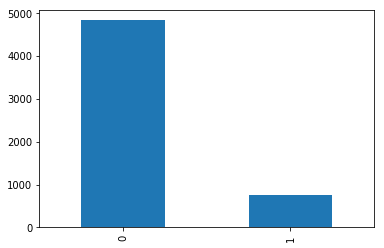

In [220]:
%matplotlib inline
import matplotlib.pyplot as plt
data['v1'].value_counts().plot(kind='bar')

In [221]:
ydata=data['v1']
xdata=data['v2']
len(xdata)

5572

### 작업 순서
1. 문장을 단어 단위로 토큰화 (토큰:텍스트 의미의 최소 단위)
2. 단어 토큰 -> 정수로 인코딩



In [0]:
from keras.preprocessing.text import Tokenizer

In [0]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(xdata) # 각 행에 대한 토큰화 수행 => xdata에 대한 코퍼스 생성, 중복 X
word_index=tokenizer.word_index # 단어의 인덱스 확인(1부터 시작)
sequences=tokenizer.texts_to_sequences(xdata) # 정수로 저장(원본 데이터 단어를 코퍼스에 따라 정수로 변환)

In [224]:
sequences[:5] # 단어의 인덱스를 가지고 모델 생성
len(word_index) # 8920(voc의 크기)

8920

In [225]:
len(sequences) # 5572(원본 데이터 행의 개수)

5572

In [226]:
trainData=int(len(sequences)*0.8)
testData=int(len(sequences)-trainData)
trainData  # 4457
testData # 1115

1115

In [227]:
# 메일의 최대 길이 출력(xdata)
max(len(d) for d in sequences)
# 메일의 평균 길이
sum(map(len, sequences))/len(sequences) #15.79 : 메일의 평균 길이가 15개 단어로 구성되어 있음

15.794867193108399

(array([1.390e+02, 1.327e+03, 1.164e+03, 6.900e+02, 3.690e+02, 3.990e+02,
        4.950e+02, 5.130e+02, 2.810e+02, 6.000e+01, 3.900e+01, 1.400e+01,
        1.200e+01, 7.000e+00, 1.700e+01, 7.000e+00, 9.000e+00, 3.000e+00,
        6.000e+00, 2.000e+00, 3.000e+00, 4.000e+00, 0.000e+00, 4.000e+00,
        0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  0.  ,   3.78,   7.56,  11.34,  15.12,  18.9 ,  22.68,  26.46,
         30.24,  34.02,  37.8 ,  41.58,  45.36,  49.14,  52.92,  56.7 ,
         60.48,  64.26,  68.04,  71.82,  75.6 ,  79.38,  83.16,  86.94,
         90.72,  94.5 ,  98.28, 102.06, 105.84, 109.62, 113.4 , 117.18,
        120.96, 124.74, 128.52, 132.3 , 136.08, 139.86, 143.64, 147.42,
        151.2 , 

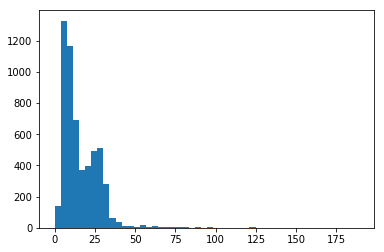

In [228]:
xdata=sequences
plt.hist([len(s) for s in xdata], bins=50)

In [0]:
# 가장 긴 메일의 길이:189,
# 50미만이 대부분(업데이트)

In [0]:
from keras.layers import *
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

In [0]:
vocab_size=len(word_index)+1 #8920 + 1 => 8921

In [232]:
# 전체 데이터셋의 길이를 189로 통일
max_len=189
data=pad_sequences(xdata, maxlen=max_len) # pre padding
data.shape # (5572, 189)

(5572, 189)

In [0]:
data[:5]
xtest=data[trainData:]  # 뒤쪽 1115개
ytest=ydata[trainData:]
xtrain=data[:trainData] # 앞쪽 4457개
ytrain=ydata[:trainData]

Train on 3565 samples, validate on 892 samples
Epoch 1/5
3565/3565 [==============================] - 6s 2ms/step - loss: 0.3253 - acc: 0.8906 - val_loss: 0.2951 - val_acc: 0.8744
Epoch 2/5
3565/3565 [==============================] - 5s 1ms/step - loss: 0.0975 - acc: 0.9728 - val_loss: 0.0644 - val_acc: 0.9821
Epoch 3/5
3565/3565 [==============================] - 5s 1ms/step - loss: 0.0443 - acc: 0.9888 - val_loss: 0.0645 - val_acc: 0.9787
Epoch 4/5
3565/3565 [==============================] - 5s 1ms/step - loss: 0.1399 - acc: 0.9445 - val_loss: 0.2142 - val_acc: 0.9126
Epoch 5/5
1115/1115 [==============================] - 1s 459us/step


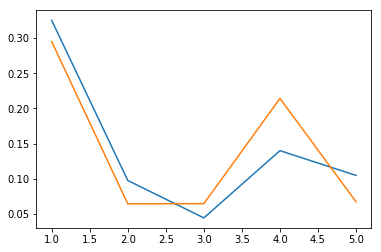

In [250]:
session = tf.Session()

with session.as_default():
    with session.graph.as_default():
        model = Sequential()
        model.add(Embedding(vocab_size, 32)) # 고차원의 데이터를 저차원으로 
        model.add(SimpleRNN(32)) # hidden_size = 32
        model.add(Dense(1, activation="sigmoid"))
        
        model.compile(optimizer="rmsprop", 
              loss="binary_crossentropy", 
              metrics=["acc"])
        
        history = model.fit(xtrain, ytrain, epochs=5, batch_size=60, validation_split=0.2)
        model.evaluate(xtest, ytest)[1]
        

epchs = range(1, len(history.history["acc"])+1)
plt.plot(epchs, history.history["loss"])
plt.plot(epchs, history.history["val_loss"])
plt.show()